#INSTALL LIBRARY

In [1]:
# Pip install/update these packages/modules if they're not yet installed/updated.
#!pip install openpyxl==3.0.5
#!pip install pandas==1.2.4

In [2]:
# Import Python Library

# To read, save, or load the dataset
import pandas as pd
import csv

# Data Preprocessing
import re 
import string
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk as nlp
import nltk.corpus
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import everygrams
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
import pickle as pk
from scipy import sparse as sp

# Text Manipulation
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# For general visualizations / text analysis
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud 
import plotly.express as px
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')

# For classification and sentiment analysis
from textblob import TextBlob
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score, precision_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
# Using pandas library and 'read_excel' function to read Capstone2_FinalReport_Dataset.xlsx file into Python.
df = pd.read_excel('Capstone2_FinalReport_Dataset.xlsx')

In [4]:
# Displays the first 20 rows from the listings dataset with all variables as example.
df.head(20)

,Country,Area,Date,Rating,Travel Status,Title,Review
0,Singapore,Singapore,2020-02-28,5,Solo,trying out Sunway clio Hotel,"Great location, comfortable and clean room, qu..."
1,Singapore,Singapore,2020-02-27,5,Business,Very nice hotel to stay in!,Stayed at the Sunway Pyramid Hotel for 3 night...
2,Mauritius,NaN,2020-02-27,4,Business,Breakfast was crap and late check out rules to...,"Great for couples, families or just a business..."
3,Singapore,Singapore,2020-02-25,5,Friends,"Newly renovated hotel, accomodating staff, con...",The rooms are newly renovated with great furni...
4,Brunei,Bandar Seri Begawan,2020-02-25,5,Friends,End year getaway,Everything you need is within close proximity ...
5,Brunei,Brunei,2020-02-24,5,Friends,Overall good,Very convenient. You don't have to go out of t...
6,Malaysia,Perak,2020-02-24,4,Business,Bad experience on 2nd July 2015,"Helpful staff, great hospitality n room was we..."
7,Malaysia,Seremban,2020-02-23,1,Solo,"Hotel needs major uplift, though location is good",New building with poor service and unfriendly ...
8,Malaysia,Subang Jaya,2020-02-23,4,Solo,Not good value for money,No late checkout option even if you checkin at...
9,Mauritius,NaN,2020-02-23,4,Solo,My experience.,Now friendly staff


In [5]:
# prints the number of variables and observations of the listings dataset.
print('Number of variables: {}'.format(df.shape[1]))
print('Number of observations: {}'.format(df.shape[0]))

Number of variables: 7
Number of observations: 1975


In [6]:
# shows the basic information of the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Country        1975 non-null   object        
 1   Area           814 non-null    object        
 2   Date           1975 non-null   datetime64[ns]
 3   Rating         1975 non-null   int64         
 4   Travel Status  1975 non-null   object        
 5   Title          977 non-null    object        
 6   Review         1975 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 108.1+ KB


In [7]:
#Checking which variable contains null or missing values.
df.isnull().sum()

Country             0
Area             1161
Date                0
Rating              0
Travel Status       0
Title             998
Review              0
dtype: int64

#DATA PREPROCESSING

In [8]:
# Dropping variables for future data exploration and analysis.
df.drop(['Title', 'Area'], axis=1, inplace=True)

In [9]:
# Change the datatype of Date and Feature it into Year and Month
import datetime

df['Date'] = pd.to_datetime(df['Date'])

df['YDate'], df['MDate'] = df['Date'].dt.year, df['Date'].dt.month

df

,Country,Date,Rating,Travel Status,Review,YDate,MDate
0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2
1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2
2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2
3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2
4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2
...,...,...,...,...,...,...,...
1970,Philippines,2019-03-01,5,Business,Front Desk needs a little bit more warmth,2019,3
1971,Philippines,2019-03-01,5,Business,Airport shuttle services shows 90MYR but was a...,2019,3
1972,Philippines,2019-03-01,5,Business,Gym is a bit small but has enough equipment to...,2019,3
1973,Philippines,2019-03-01,5,Business,Hotel was still on soft opening and swimming p...,2019,3


In [10]:
# Investigate all the elements whithin each Feature 
#How many unique values are they , and what are they  ? 

#efficient and scalable way
for column in df:
    unique_values = np.unique(df[column])
    unique_count = len(unique_values)
    if unique_count <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, unique_count, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, unique_count))

The number of values for feature Country is: 46
The number of values for feature Date is: 467
The number of values for feature Rating is: 5 -- [1 2 3 4 5]
The number of values for feature Travel Status is: 5 -- ['Business' 'Couple' 'Family' 'Friends' 'Solo']
The number of values for feature Review is: 1972
The number of values for feature YDate is: 3 -- [2018 2019 2020]
The number of values for feature MDate is: 12


In [11]:
#convert text to lowercase 
#removing numbers 
#removing punctuation 
#removing stop words
#Lemmatization
#filter out single characters 
cleaned_reviews_list = []
for cleaned_reviews in df.Review:
    cleaned_reviews = re.sub("[^a-zA-Z]", " ", cleaned_reviews)
    cleaned_reviews = cleaned_reviews.lower()
    cleaned_reviews = nltk.word_tokenize(cleaned_reviews)
    cleaned_reviews = [word for word in cleaned_reviews if not word in 
                    set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    cleaned_reviews = [lemma.lemmatize(word) for word in cleaned_reviews]
    cleaned_reviews = " ".join(w for w in cleaned_reviews if len(w) > 1)
    cleaned_reviews_list.append(cleaned_reviews)


In [12]:
# Save and display data in new column
df["Review_clean"] = cleaned_reviews_list
df.head(10)

,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean
0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...
1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...
2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area
3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...
4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...
5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...
6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...
7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager
8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin
9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff


In [13]:
# Removing whitespaces by splitting Review_clean for counter
def split_name(Review_clean):
    split = str(Review_clean).split()
    return split

# Store the data in a list for text visualization
reviews_count_list = []
for x in cleaned_reviews_list:
    for y in split_name(x):
        reviews_count_list.append(y)



> SENTIMENT DATA PREPARATION


In [14]:
# Create a function to get the subjectivity
def getSubjectivity(Review_clean): 
  return TextBlob(Review_clean).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(Review_clean): 
  return TextBlob(Review_clean).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Review_clean'].apply(getSubjectivity)
df['Polarity'] = df['Review_clean'].apply(getPolarity)

# Show the new dataframe with the new columns
df.head(10)

,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity
0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444
1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182
2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000
3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208
4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000
5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167
6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667
7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818
8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000
9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000


In [15]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score): 
  if score < 0: 
    return "Negative" 
  elif score == 0:
    return "Neutral" 
  else:
    return "Positive" 
  
df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df.head(10)

,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment
0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive
1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive
2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive
3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive
4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive
5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive
6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive
7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative
8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative
9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive


In [16]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score): 
  if score < 0: 
    return -1 #negative
  elif score == 0:
    return 0 #neutral
  else:
    return 1 #positive
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(10)

,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis
0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1
1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1
2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1
3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1
4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1
5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive,1
6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive,1
7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative,-1
8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative,-1
9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive,1


In [17]:
df.Analysis.value_counts()

 1    1426
 0     288
-1     261
Name: Analysis, dtype: int64

In [18]:
df.Analysis.value_counts(normalize=True)

 1    0.722025
 0    0.145823
-1    0.132152
Name: Analysis, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Country        1975 non-null   object        
 1   Date           1975 non-null   datetime64[ns]
 2   Rating         1975 non-null   int64         
 3   Travel Status  1975 non-null   object        
 4   Review         1975 non-null   object        
 5   YDate          1975 non-null   int64         
 6   MDate          1975 non-null   int64         
 7   Review_clean   1975 non-null   object        
 8   Subjectivity   1975 non-null   float64       
 9   Polarity       1975 non-null   float64       
 10  Sentiment      1975 non-null   object        
 11  Analysis       1975 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 185.3+ KB


#EXPLORATORY DATA ANALYSIS


In [20]:
class_dist = df['Rating'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

ditribution_plot(x= class_dist.index, y= class_dist.values, name= 'Rating Distribution of Data')

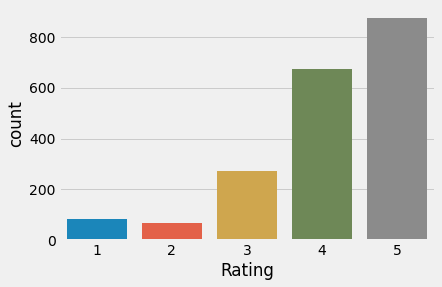

In [21]:
sns.countplot(df['Rating'])

In [22]:
# l is the list which has the names of the labels which is 1,2,3,4,5 and y is the count of these labels
l=[]
r=[]
for i in range(1,6):
    l.append(i)
    r.append(len(df[df['Rating']==i]))
    
# Plotting a countplot pie chart for ratings
fig_pie = px.pie(values=r, names=l, title='Rating Distribution of Data')
fig_pie.show()

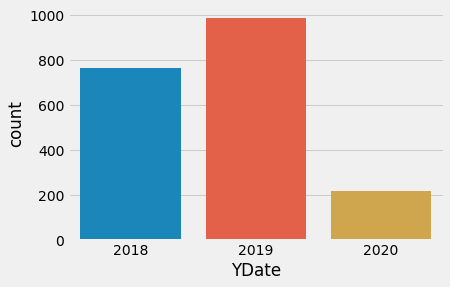

In [23]:
sns.countplot(df['YDate'])

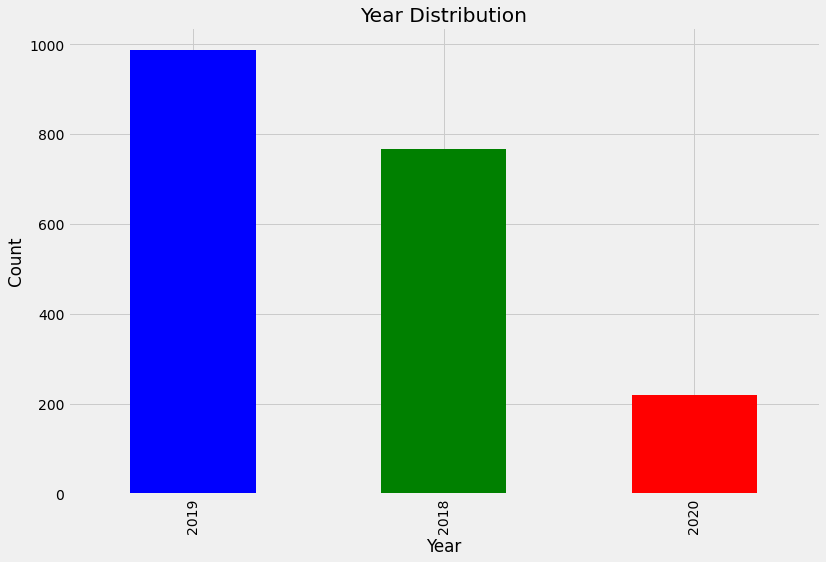

In [24]:
# Plot and visualize the counts of sentiment analysis
plt.figure(figsize=(12,8))
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
df['YDate'].value_counts().plot(kind='bar', color=['blue', 'green', 'red']) 

plt.show()

In [25]:
class_dist = df['Country'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

ditribution_plot(x= class_dist.index, y= class_dist.values, name= 'Country Distribution')

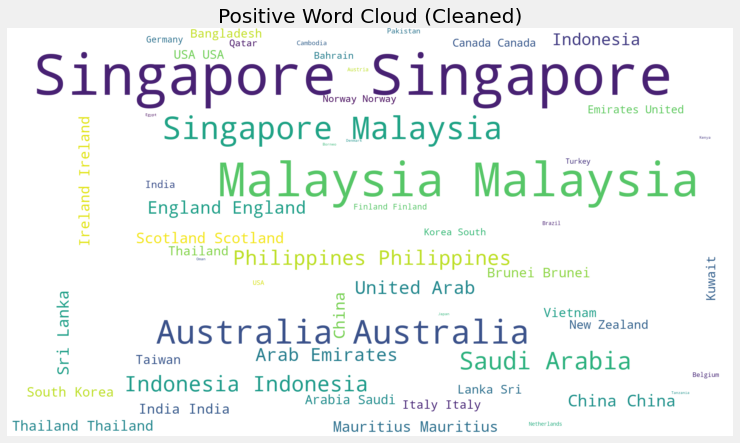

In [26]:
# Plot the Country WordCloud 
countryWC = df['Country']

plt.figure(figsize=(15,7))
plt.title('Positive Word Cloud (Cleaned)')
allWords = ' '.join([twts for twts in countryWC])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 2, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_reviews_positive_wordcloud.png')
plt.show()

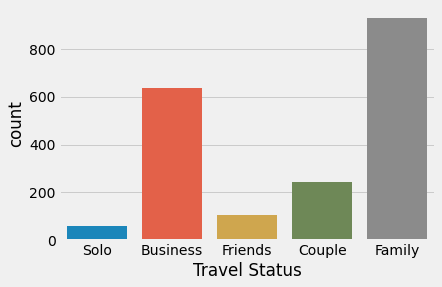

In [27]:
sns.countplot(df['Travel Status'])

In [28]:
class_dist = df['Travel Status'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

ditribution_plot(x= class_dist.index, y= class_dist.values, name= 'Travel Status Distribution')



> Exploratary Sentiment Data Analysis



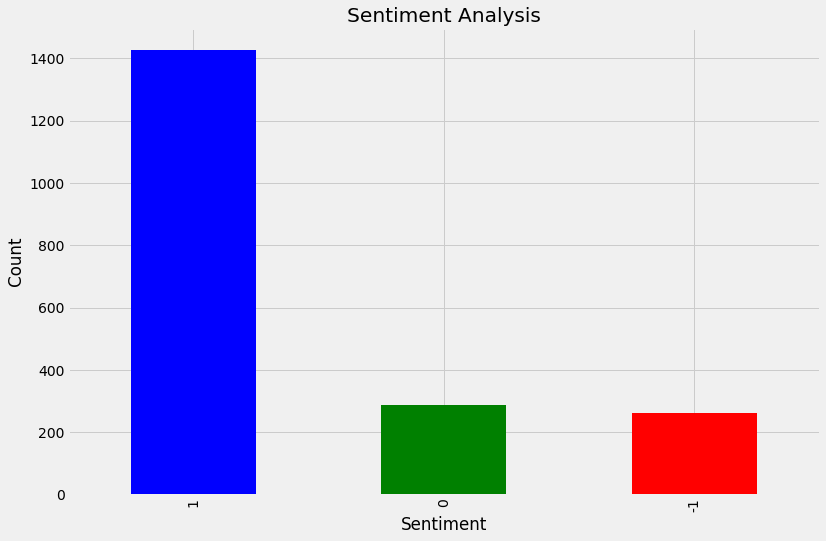

In [29]:
# Plot and visualize the counts of sentiment analysis
plt.figure(figsize=(12,8))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar', color=['blue', 'green', 'red']) 

plt.show()

In [30]:
# Violin plot of Rating and Sentiment Score with box plot embedded in it
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=df['Rating'][df['Rating'] == rating],
                            y=df['Polarity'][df['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
    
fig.show()

In [31]:
# Grouping the data on the basis on Rating and Sentiment and counting the sentiment score
data2=df.groupby(['Rating','Sentiment'])['Polarity'].count()


# X here is the Ratings and Y is the Sentiment
X=[i[0] for i in data2.index.values]
Y=[i[1] for i in data2.index.values]

# Plotting the Bar Graph 
fig = px.bar(x=X, y=data2.values, color=Y, title="Sentiment Distribution WRT Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

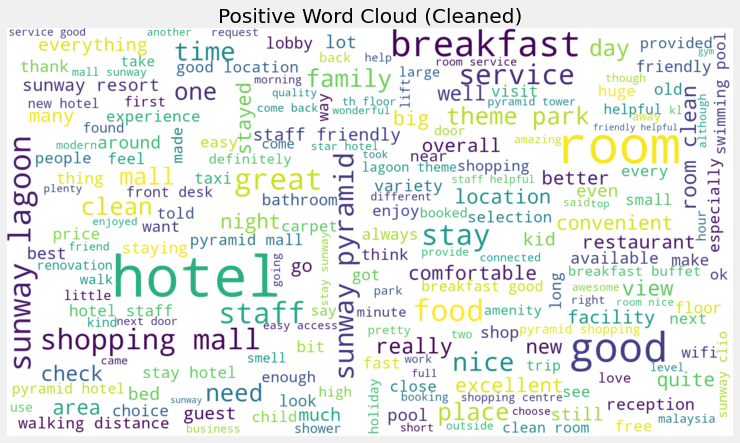

In [32]:
# Plot the Positive Reviews WordCloud 
previews = df[df.Analysis == 1]
previews = previews['Review_clean']

plt.figure(figsize=(15,7))
plt.title('Positive Word Cloud (Cleaned)')
allWords = ' '.join([twts for twts in previews])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_reviews_positive_wordcloud.png')
plt.show()

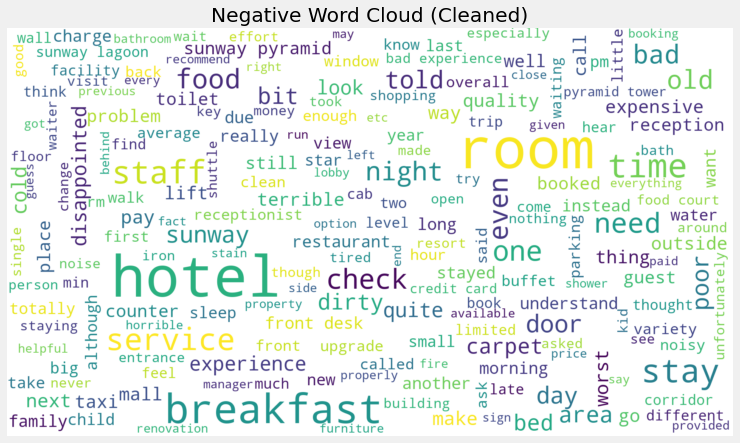

In [33]:
# Plot the Negative Reviews WordCloud 
nreviews = df[df.Analysis == -1]
nreviews = nreviews['Review_clean']

plt.figure(figsize=(15,7))
plt.title('Negative Word Cloud (Cleaned)')
allWords = ' '.join([twts for twts in nreviews])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_reviews_negative_wordcloud.png')
plt.show()

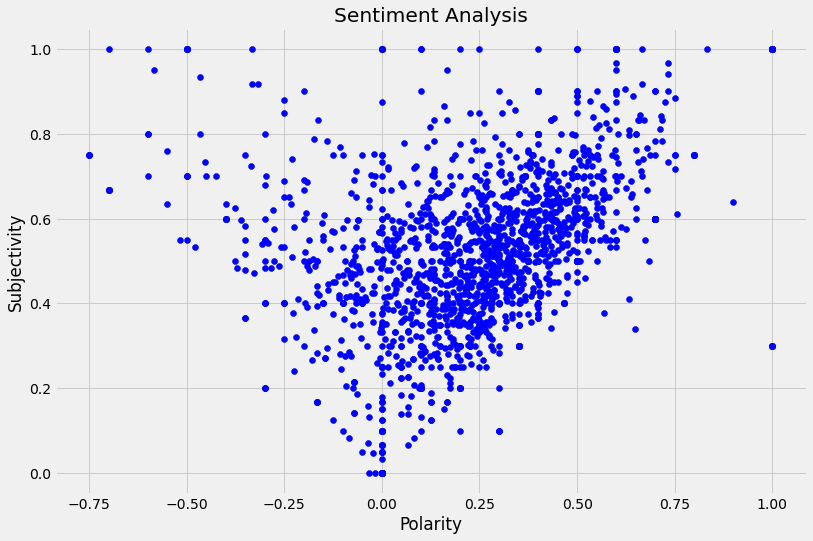

In [34]:
# Plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0, df.shape[0]): 
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

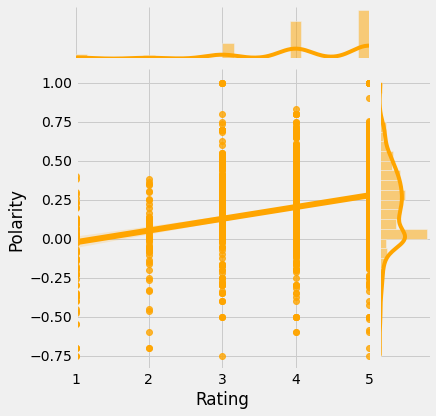

In [35]:
# Jointplot on the basis of Rating and Sentiment Score of the data
sns.jointplot(data=df,x='Rating',y='Polarity',kind='reg',color='orange')

#TEXT ANALYSIS

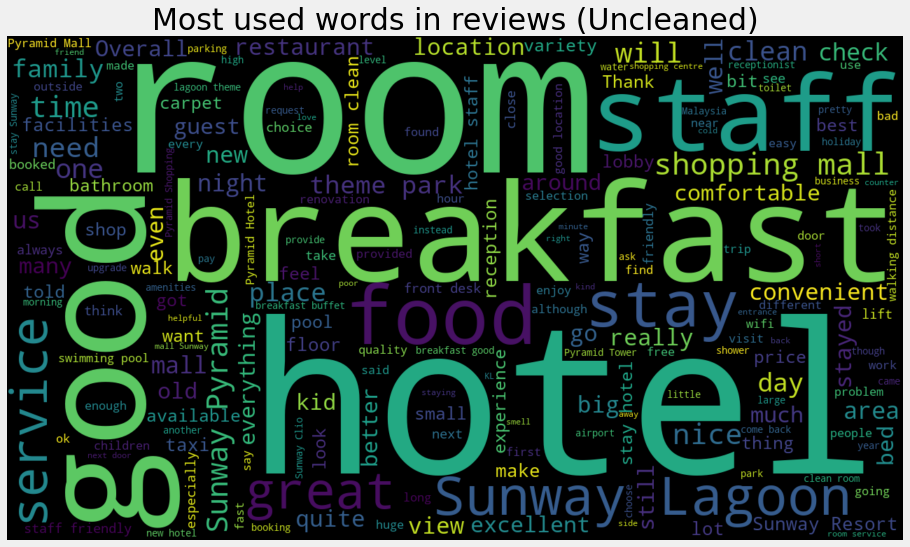

In [36]:
def wordCloud_generator(df, title=None):
    wordcloud = WordCloud(width = 1280, height = 720,
                          background_color ='black',
                          max_font_size = 300
                         ).generate(" ".join(df.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (15, 7), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

wordCloud_generator(df['Review'], title="Most used words in reviews (Uncleaned)")

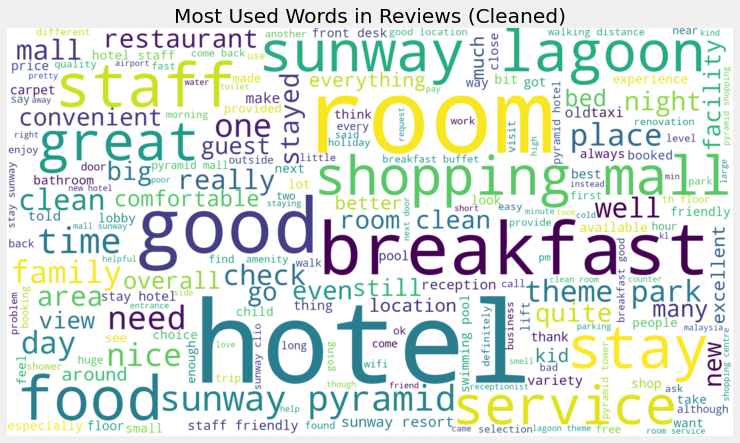

In [37]:
# Plot the word cloud 
plt.figure(figsize=(15,7))
plt.title('Most Used Words in Reviews (Cleaned)')
allWords = ' '.join([twts for twts in reviews_count_list])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=300).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_review_wordcloud.png')
plt.show()

[Text(0, 0, 'hotel'),
 Text(0, 0, 'room'),
 Text(0, 0, 'sunway'),
 Text(0, 0, 'good'),
 Text(0, 0, 'breakfast'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'mall'),
 Text(0, 0, 'stay'),
 Text(0, 0, 'shopping'),
 Text(0, 0, 'clean'),
 Text(0, 0, 'service'),
 Text(0, 0, 'food'),
 Text(0, 0, 'lagoon'),
 Text(0, 0, 'pyramid'),
 Text(0, 0, 'park'),
 Text(0, 0, 'time'),
 Text(0, 0, 'great'),
 Text(0, 0, 'check'),
 Text(0, 0, 'nice'),
 Text(0, 0, 'location'),
 Text(0, 0, 'also'),
 Text(0, 0, 'friendly'),
 Text(0, 0, 'one'),
 Text(0, 0, 'next'),
 Text(0, 0, 'family')]

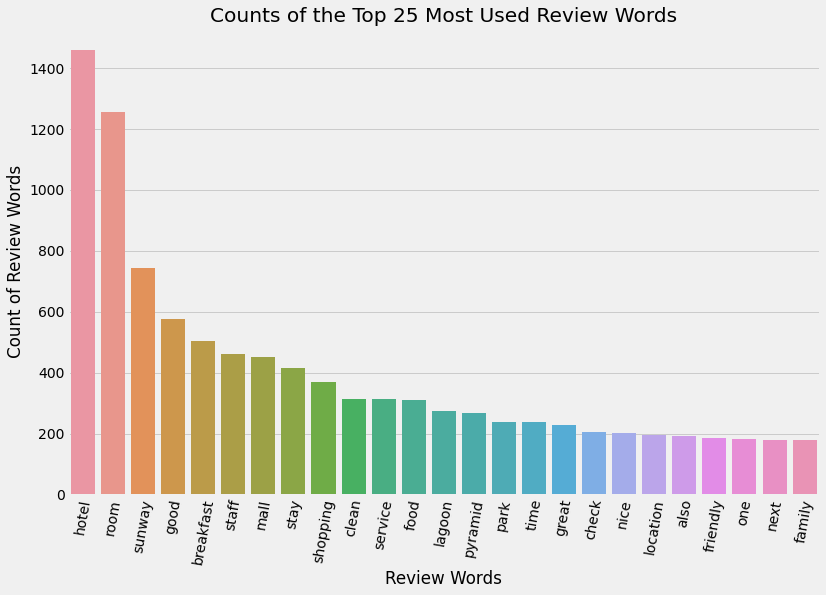

In [38]:
# Top 25 used Review Words in Review_clean
top_25_reviews = Counter(reviews_count_list).most_common()
top_25_reviews = top_25_reviews[0:25]

# Put our findings in dataframe for further visualizations
sub_plot=pd.DataFrame(top_25_reviews)
sub_plot.rename(columns={0:'Review Words', 1:'Count'}, inplace=True)

# Use barplot for this visualization
plt.figure(figsize=(12,8))
viz_1=sns.barplot(x='Review Words', y='Count', data=sub_plot)
viz_1.set_title('Counts of the Top 25 Most Used Review Words')
viz_1.set_ylabel('Count of Review Words')
viz_1.set_xlabel('Review Words')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

[Text(0, 0, "('sunway', 'lagoon')"),
 Text(0, 0, "('shopping', 'mall')"),
 Text(0, 0, "('sunway', 'pyramid')"),
 Text(0, 0, "('theme', 'park')"),
 Text(0, 0, "('room', 'clean')"),
 Text(0, 0, "('sunway', 'resort')"),
 Text(0, 0, "('staff', 'friendly')"),
 Text(0, 0, "('stay', 'hotel')"),
 Text(0, 0, "('hotel', 'staff')"),
 Text(0, 0, "('hotel', 'room')"),
 Text(0, 0, "('front', 'desk')"),
 Text(0, 0, "('swimming', 'pool')"),
 Text(0, 0, "('pyramid', 'mall')"),
 Text(0, 0, "('pyramid', 'hotel')"),
 Text(0, 0, "('walking', 'distance')"),
 Text(0, 0, "('sunway', 'hotel')"),
 Text(0, 0, "('good', 'location')"),
 Text(0, 0, "('breakfast', 'buffet')"),
 Text(0, 0, "('th', 'floor')"),
 Text(0, 0, "('sunway', 'clio')"),
 Text(0, 0, "('pyramid', 'tower')"),
 Text(0, 0, "('come', 'back')"),
 Text(0, 0, "('stay', 'sunway')"),
 Text(0, 0, "('lagoon', 'theme')"),
 Text(0, 0, "('lagoon', 'theme', 'park')")]

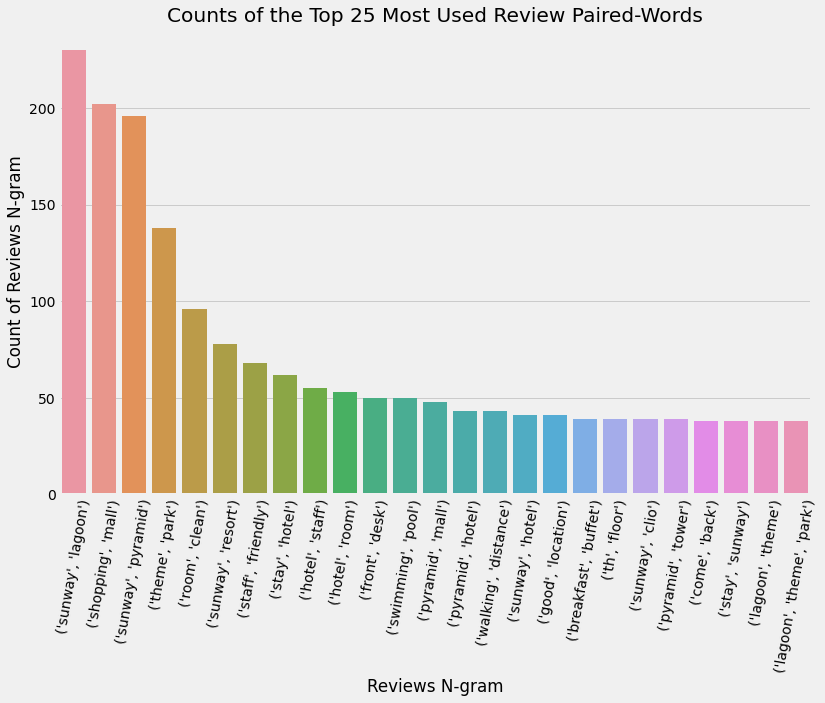

In [39]:
# Top 25 used Review Ngrams in Review_clean
top_25_ngrams = Counter(everygrams(reviews_count_list, min_len=2, max_len=4)).most_common(25)

# Put our findings in dataframe for further visualizations
sub_plot=pd.DataFrame(top_25_ngrams)
sub_plot.rename(columns={0:'Reviews N-gram', 1:'Count'}, inplace=True)

# Use barplot for this visualization
plt.figure(figsize=(12,8))
viz_1=sns.barplot(x='Reviews N-gram', y='Count', data=sub_plot)
viz_1.set_title('Counts of the Top 25 Most Used Review Paired-Words')
viz_1.set_ylabel('Count of Reviews N-gram')
viz_1.set_xlabel('Reviews N-gram')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

#SENTIMENT ANALYSIS: MACHINE LEARNING BASED APPROACH (CLASSIFICATION)

> MODELING & EVALUATION

In [40]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score): 
  if score < 0: 
    return "Negative" 
  elif score == 0:
    return "Positive" 
  else:
    return "Positive" 
  
df['SentimentML'] = df['Polarity'].apply(getAnalysis)

df.head(10)

,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis,SentimentML
0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1,Positive
1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1,Positive
2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1,Positive
3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1,Positive
4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1,Positive
5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive,1,Positive
6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive,1,Positive
7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative,-1,Negative
8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative,-1,Negative
9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive,1,Positive


In [41]:
# Save into the clean dataset

df.to_csv('Capstone2_FinalReport_Dataset_Clean.csv')

In [42]:
docs = list(df['Review_clean'])[:7000]

# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 20000) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

X = tfidf_vectorizer_vectors.toarray()
Y = df['SentimentML'][:7000]

In [43]:
len(X[0])

SEED=123

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)



> Decision Tree Classifier



Decision Tree Classifier 

              precision    recall  f1-score   support

    positive       0.53      0.46      0.49        52
    negative       0.92      0.94      0.93       343

    accuracy                           0.88       395
   macro avg       0.73      0.70      0.71       395
weighted avg       0.87      0.88      0.87       395

---------------
Training Accuracy score: 1.0
Testing Accuracy score: 0.8759
--------------- 

Decision Tree Confusion matrix

 [[ 24  28]
 [ 21 322]]




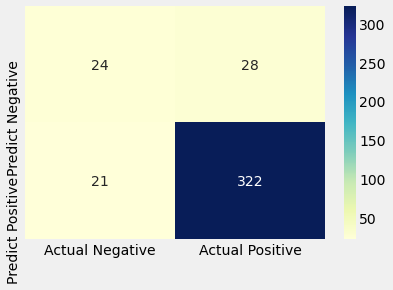

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)

print("Decision Tree Classifier","\n")
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_pred_test)
print('Decision Tree Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()




> Gaussian Naive Bayes Classifier



Gaussian Naive Bayes (NB) Classifier 

              precision    recall  f1-score   support

    positive       0.20      0.25      0.22        52
    negative       0.88      0.85      0.86       343

    accuracy                           0.77       395
   macro avg       0.54      0.55      0.54       395
weighted avg       0.79      0.77      0.78       395

---------------
Training Accuracy score: 0.8785
Testing Accuracy score: 0.7671
--------------- 

Gaussian Naive Bayes (NB) Confusion matrix

 [[ 13  39]
 [ 53 290]]




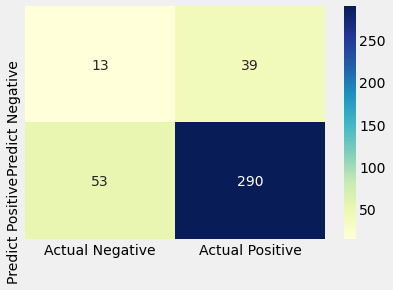

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print("Gaussian Naive Bayes (NB) Classifier","\n")
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_pred_test)
print('Gaussian Naive Bayes (NB) Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


Multinomial naive Bayes assumes to have feature vector where each element represents the number of times it appears (or, very often, its frequency). This technique is very efficient in natural language processing or whenever the samples are composed starting from a common dictionary. 

The Gaussian Naive Bayes, instead, is based on a continuous distribution and it’s suitable for more generic classification tasks.

In summary, Naive Bayes classifier is a general term which refers to conditional independence of each of the features in the model, while Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.



> Logistic Regression



Logistic Regression Classifier 

              precision    recall  f1-score   support

    positive       1.00      0.04      0.07        52
    negative       0.87      1.00      0.93       343

    accuracy                           0.87       395
   macro avg       0.94      0.52      0.50       395
weighted avg       0.89      0.87      0.82       395

---------------
Training Accuracy score: 0.8759
Testing Accuracy score: 0.8734
--------------- 

Logistic Regression Confusion matrix

 [[  2  50]
 [  0 343]]




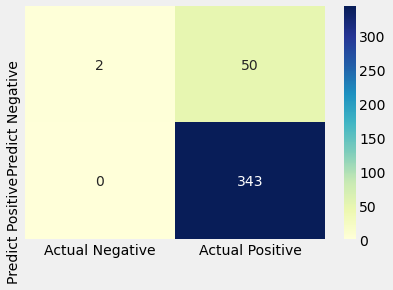

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=SEED).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Logistic Regression Classifier","\n")
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,lr.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,lr.predict(X_test)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_pred_test)
print('Logistic Regression Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


#DEPLOYMENT

#PICKING THE BEST MODEL

> Ensemble Learning/Modelling or Ensembling







> Random Forest Classifier (Bagging Ensemble Classifer)



Random Forest (Bagging Ensemble) Classifer 

              precision    recall  f1-score   support

    positive       0.86      0.23      0.36        52
    negative       0.90      0.99      0.94       343

    accuracy                           0.89       395
   macro avg       0.88      0.61      0.65       395
weighted avg       0.89      0.89      0.87       395

---------------
Training Accuracy score: 0.9975
Testing Accuracy score: 0.8937
--------------- 

Random Forest (Bagging Ensemble) Confusion matrix

 [[ 12  40]
 [  2 341]]




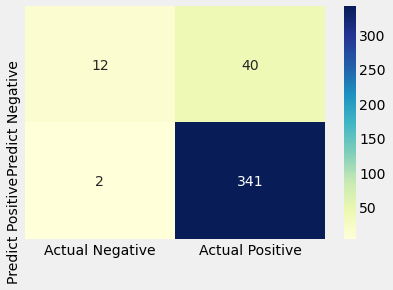

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Random Forest (Bagging Ensemble) Classifer","\n")
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_pred_test)
print('Random Forest (Bagging Ensemble) Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()




> Boosting Classifer



AdaBoost (Boosting Ensemble) Classifer
Boost using Decision Tree 

              precision    recall  f1-score   support

    positive       0.55      0.46      0.50        52
    negative       0.92      0.94      0.93       343

    accuracy                           0.88       395
   macro avg       0.73      0.70      0.72       395
weighted avg       0.87      0.88      0.87       395

---------------
Training Accuracy score: 1.0
Testing Accuracy score: 0.8785
--------------- 

AdaBoost (Boosting Ensemble) Confusion matrix

 [[ 24  28]
 [ 20 323]]




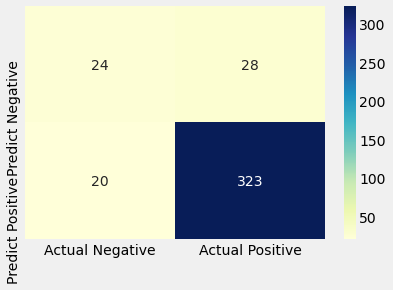

In [48]:
#Boosting - Ada Boost
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(X_train,y_train)
y_pred_train = adb.predict(X_train)
y_pred_test = adb.predict(X_test)

print("AdaBoost (Boosting Ensemble) Classifer")
print("Boost using Decision Tree","\n")
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))
print("---------------")
print("Training Accuracy score: "+ str(round(adb.score(X_train,y_train),4)))
print("Testing Accuracy score: "+ str(round(adb.score(X_test,y_test),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_pred_test)
print('AdaBoost (Boosting Ensemble) Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



> Voting Classifier



Voting Ensambling Classifier

Combining Three Classifiers
1. Decision Tree 2. Logistic Regression 3. Gaussian Naive Bayes

              precision    recall  f1-score   support

    positive       0.80      0.15      0.26        52
    negative       0.89      0.99      0.94       343

    accuracy                           0.88       395
   macro avg       0.84      0.57      0.60       395
weighted avg       0.87      0.88      0.85       395

--------------- 

Training Accuracy score: 1.0
Testing Accuracy score: 0.8835
--------------- 

Voting Ensemble Confusion matrix

 [[  8  44]
 [  2 341]]




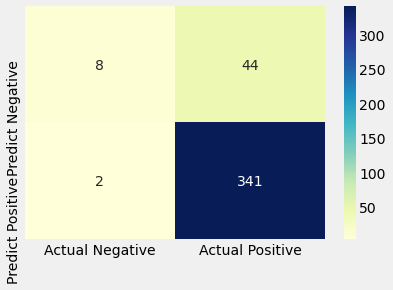

In [49]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Gaussian Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train = vc.predict(X_train)
y_pred_test = vc.predict(X_test)

print("Voting Ensambling Classifier\n")
print("Combining Three Classifiers")
print("1. Decision Tree 2. Logistic Regression 3. Gaussian Naive Bayes\n")
print(classification_report(y_test, y_pred_test, target_names=['positive', 'negative']))
print("---------------","\n")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_pred_test)
print('Voting Ensemble Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Ensemble Learning / Ensembling can remove the bias of data or model. 

Ensemble Learning is using multiple learning algorithms at a time, to obtain predictions with an aim to have better predictions than the individual models.

Ensemble learning is a very popular method to improve the accuracy of a machine learning model. 
It avoid overfitting and gives us a much better model. 
bootstrap aggregating (Bagging) and boosting are popular ensemble methods. 